In [4]:
cd G:\Academic\Coursework\CH5019 - Mathematical Foundations of Data Science\Term project 2020\Dataset_Question2\Resources collected

G:\Academic\Coursework\CH5019 - Mathematical Foundations of Data Science\Term project 2020\Dataset_Question2\Resources collected


**** I've tried to implement the logistic regression classifier with gradient descent from scratch. I'm new to Machine Learning, therefore any inputs or suggestions would be very helpful for me.**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./iris/Iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [27]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

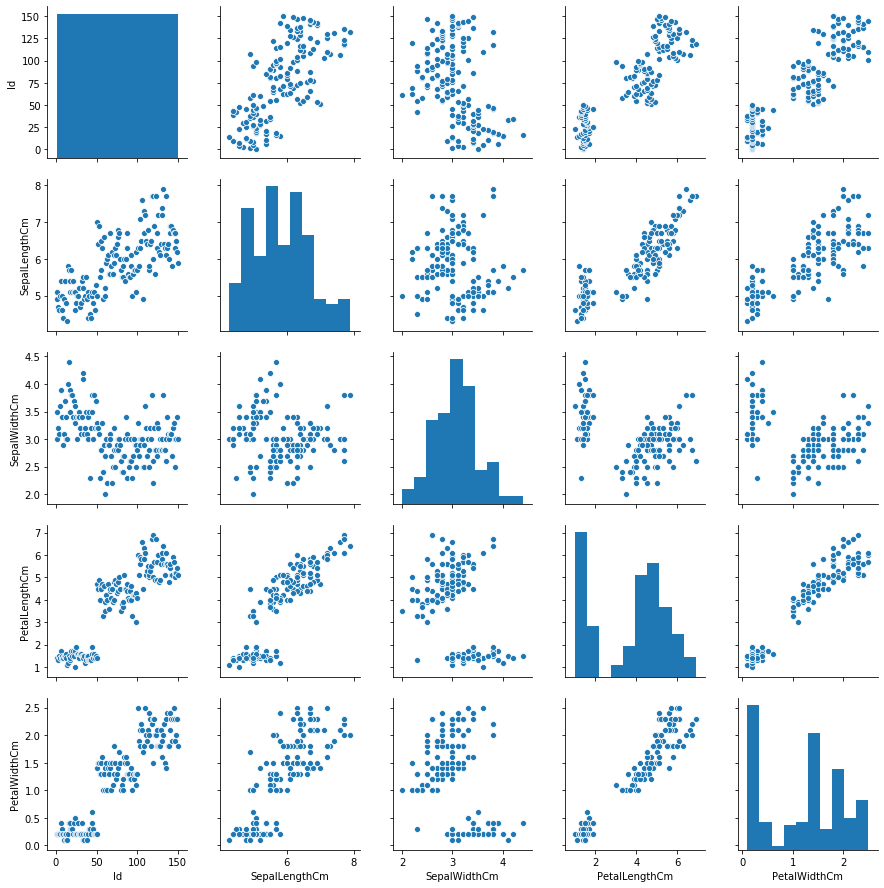

In [29]:
# Basic correlogram
sns.pairplot(df)

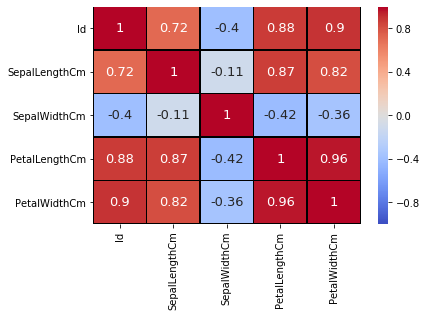

In [30]:
dataCopy = df.copy(deep=True)
gif = sns.heatmap(dataCopy.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm',annot_kws={"size":13},linewidths=0.5, linecolor='black')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#os.chdir(imageDirectory)
#plt.gcf().subplots_adjust(left=0.16); plt.gcf().subplots_adjust(bottom=0.1)
#plt.savefig('correlation_heatmap.jpg',dpi=150)
#os.chdir(parentDirectory)
plt.show()

In [9]:
# Extract sepal length and sepal width of setosa and versicolor for our binary classification problem
X = df.iloc[0:100, [1, 2]].values # input
y = df.iloc[0:100, 5].values # output
# set output label value to 1 if it is setosa and 0 if versicolor.
y = np.where(y == 'Iris-setosa', 1, 0)

In [12]:
# features standardization
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

#### Logistic Regression Cost Function

![enter image description here][1]

  [1]: https://i.stack.imgur.com/2uGpX.png

In [13]:
# Define Logistic Regression hypothesis or sigmoid function
def sigmoid(X, theta):
    z = np.dot(X, theta[1:]) + theta[0]
    return 1.0 / ( 1.0 + np.exp(-z))

In [14]:
# Define Logistic Regression Cost Function
def lrCostFunction(y, hx):
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    return j

In [15]:
# Gradient Descent function to minimize the Logistic Regression Cost Function.
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        cost.append(lrCostFunction(y, hx))
    return cost

In [16]:
# m = Number of training examples
# n = number of features
m, n = X.shape
# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)
# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 500
cost = lrGradient(X_std, y, theta, alpha, num_iter)

In [17]:
# Make a plot with number of iterations on the x-axis and the cost function on y-axis
plt.plot(range(1,len(cost)+1),cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Logistic Regression')

In [20]:
# print theta paramters 
print ('\n Logistic Regression bias(intercept) term :', theta[0])
print ('\n Logistic Regression estimated coefficients :', theta[1:])


 Logistic Regression bias(intercept) term : -0.9446651398200641

 Logistic Regression estimated coefficients : [-6.34237524  4.55808974]


In [21]:
# function to predict the output label using the parameters
def lrPredict(X):
    return np.where(sigmoid(X,theta) >= 0.5, 1, 0)

In [22]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y,classifier, h=0.02):
    # h = step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [23]:
plot_decision_boundary(X_std, y,classifier=lrPredict)
plt.title('Standardized Logistic Regression - Gradient Descent')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [24]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

logreg.fit(X_std, y)

# print theta paramters 
print ('\n sklearn bias(intercept) term :', logreg.intercept_)
print ('\n sklearn estimated coefficients :', logreg.coef_)


 sklearn bias(intercept) term : [-0.23929368]

 sklearn estimated coefficients : [[-2.70872431  2.23989346]]


F:\WinPython64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


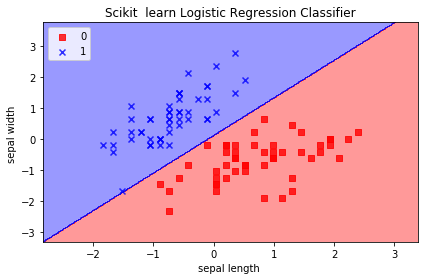

In [25]:
plot_decision_boundry(X_std, y, classifier=logreg.predict)
plt.title('Scikit  learn Logistic Regression Classifier')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()